In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

C:\Users\ggoncalves\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
data=pd.read_excel('Competição.xlsx')
data

,João,Pedro,Carlos,Amanda
0,B3SA3.SA,GUAR3.SA,B3SA3.SA,VVAR3.SA
1,VVAR3.SA,LREN3.SA,MOVI3.SA,MOVI3.SA
2,GUAR3.SA,VVAR3.SA,RENT3.SA,MGLU3.SA
3,MGLU3.SA,B3SA3.SA,MGLU3.SA,GUAR3.SA


In [3]:
joao=pd.DataFrame()
for i in data['João']:
    joao[i]=wb.DataReader(i, data_source='yahoo', start='2020-6-1') ['Adj Close']
joao=(joao/joao.iloc[0])-1
joao=sum(joao.iloc[-1])/len(joao.iloc[-1])

pedro=pd.DataFrame()
for i in data['Pedro']:
    pedro[i]=wb.DataReader(i, data_source='yahoo', start='2020-6-1') ['Adj Close']
pedro=(pedro/pedro.iloc[0])-1
pedro=sum(pedro.iloc[-1])/len(pedro.iloc[-1])

carlos=pd.DataFrame()
for i in data['Carlos']:
    carlos[i]=wb.DataReader(i, data_source='yahoo', start='2020-6-1') ['Adj Close']
carlos=(carlos/carlos.iloc[0])-1
carlos=sum(carlos.iloc[-1])/len(carlos.iloc[-1])

amanda=pd.DataFrame()
for i in data['Amanda']:
    amanda[i]=wb.DataReader(i, data_source='yahoo', start='2020-6-1') ['Adj Close']
amanda=(amanda/amanda.iloc[0])-1
amanda=sum(amanda.iloc[-1])/len(amanda.iloc[-1])

In [4]:
result={'Nomes':['João','Pedro','Carlos','Amanda'], 'Desempenho':[joao,pedro,carlos,amanda]}

In [5]:
result=pd.DataFrame(result)
result=result.sort_values('Desempenho',ascending=False)
result

,Nomes,Desempenho
1,Pedro,0.125319
3,Amanda,0.118453
0,João,0.111103
2,Carlos,0.091296


# Quem será o vencedor?

In [6]:
print('O grande vencedor foi o ' + result.iloc[0][0] + ' com uma rentabilidade de: ' + str(round(result.iloc[0][1]*100,2)) +'%')

O grande vencedor foi o Pedro com uma rentabilidade de: 12.53%


# Comparação gráfica:

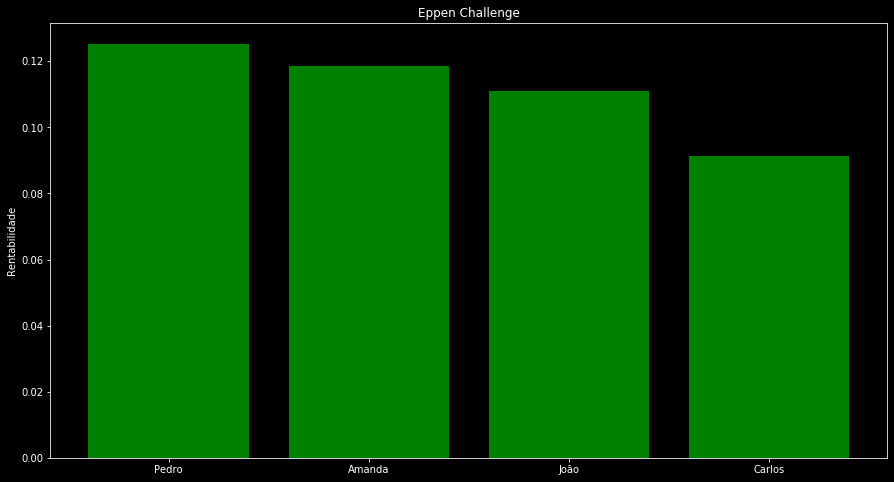

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.bar(result['Nomes'],result['Desempenho'],color='green')
plt.ylabel('Rentabilidade');
plt.title('Eppen Challenge');